# 09/06/2023

## Introducción

El objetivo de este trabajo es obtener datos históricos de un activo financiero utilizando una API y guardarlos en un archivo CSV, con el fin de realizar un análisis posterior de los datos obtenidos.

El proceso de obtención de datos de la API se encuentra implementado en el archivo "ypf_api_yahoofinance.py" que se encuentra en este repositorio. Para este propósito, se utilizó la biblioteca de código abierto "yahoo_fin", la cual nos permite acceder a los datos financieros disponibles en finance.yahoo.com.

En este caso particular, hemos seleccionado el activo financiero YPF S.A de Buenos Aires, con el símbolo YPFD.BA en finance.yahoo.com. Los valores obtenidos son con una frecuencia diaria desde el 1 de enero de 2023 hasta el 18 de mayo de 2023.

Las librerías que se utilizarán en este proyecto son las siguientes:

* yahoo_fin, para obtener los datos.
* pandas, para manipular los datos como un dataframe.
* matplotlib, para crear y visualizar gráficos a partir de los datos.
* numpy, para una mejor exploración y visualización de los datos.

### Importar las librerías

In [4]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importar los datos

In [5]:
#Importamos df
df = pd.read_csv('C:\\Users\\Tatu\\Documents\\ISPC\\Bolsa_YPF\\API\\ypf_daily_23_api.csv', index_col=0)

In [6]:
#Chequeamos df
print(df.columns)
print(df.head())

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')
         date         open         high     low   close  adjclose  volume  \
0  2023-01-02  3150.000000  3308.949951  3150.0  3295.0    3295.0  127546   
1  2023-01-03  3208.949951  3255.149902  2960.0  2998.0    2998.0  443445   
2  2023-01-04  3060.000000  3060.000000  2941.0  3000.0    3000.0  261037   
3  2023-01-05  2985.000000  3204.949951  2985.0  3180.5    3180.5  304472   
4  2023-01-06  3220.000000  3317.000000  3210.0  3237.0    3237.0  262102   

    ticker  
0  YPFD.BA  
1  YPFD.BA  
2  YPFD.BA  
3  YPFD.BA  
4  YPFD.BA  


In [7]:
# Convertimos la columna "date" al tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Edita la columna "date" para obtener solo el mes y el día ("MM-DD")
df['date'] = df['date'].dt.strftime('%m-%d')

# Muestra el DataFrame resultante
print(df.head())

    date         open         high     low   close  adjclose  volume   ticker
0  01-02  3150.000000  3308.949951  3150.0  3295.0    3295.0  127546  YPFD.BA
1  01-03  3208.949951  3255.149902  2960.0  2998.0    2998.0  443445  YPFD.BA
2  01-04  3060.000000  3060.000000  2941.0  3000.0    3000.0  261037  YPFD.BA
3  01-05  2985.000000  3204.949951  2985.0  3180.5    3180.5  304472  YPFD.BA
4  01-06  3220.000000  3317.000000  3210.0  3237.0    3237.0  262102  YPFD.BA


## Gráfico de los datos

C:\Users\Tatu\AppData\Local\Temp\ipykernel_8988\2627767866.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


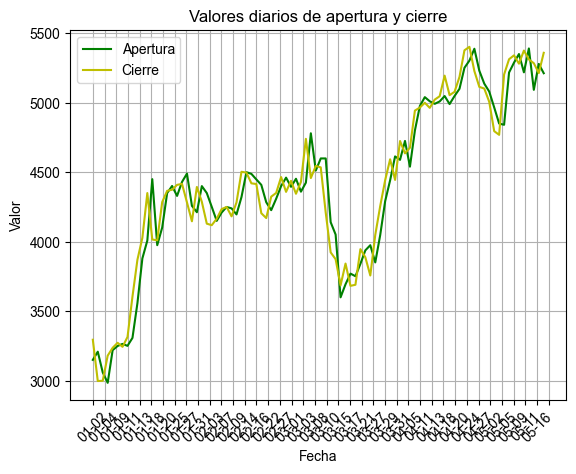

In [8]:
# Grafico de apertura y cierre
plt.plot(df['date'], df['open'], color= 'g', label='Apertura')
plt.plot(df['date'], df['close'], color= 'y', label='Cierre')
plt.legend()

plt.style.use('seaborn')

#Correccion de las etiquetas en el eje x para que sean legibles
#Reducir la frecuencia de las etiquetas a solo 40
plt.xticks(np.linspace(0, 92, num=40))
#Rotando a 45 grados
plt.xticks(rotation=45)

#titulos
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores diarios de apertura y cierre')

#Grilla
plt.grid(True)

plt.show()

Podemos observar que los valores de apertura y cierre se mantienen en niveles similares en cada fecha.

Destaca una notable disminución en los valores de las acciones entre el 8 y el 10 de marzo, seguido de una estabilidad en los precios durante aproximadamente una semana, hasta el 29 de marzo cuando experimenta un aumento significativo.

C:\Users\Tatu\AppData\Local\Temp\ipykernel_8988\2093726328.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


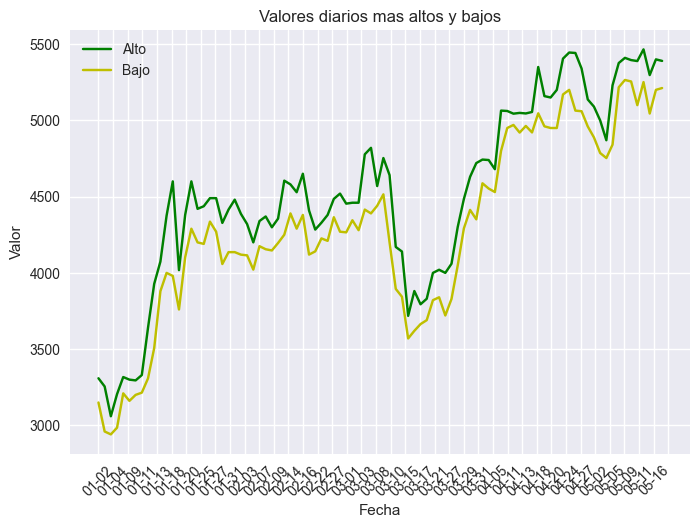

In [9]:
# Grafico de valores mas altos y mas bajos
plt.plot(df['date'], df['high'], color= 'g', label='Alto')
plt.plot(df['date'], df['low'], color= 'y', label='Bajo')
plt.legend()

plt.style.use('seaborn')

#Correccion de las etiquetas en el eje x para que sean legibles
#Reducir la frecuencia de las etiquetas a solo 40
plt.xticks(np.linspace(0, 92, num=40))
#Rotando a 45 grados
plt.xticks(rotation=45)

#titulos
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores diarios mas altos y bajos')

#Grilla
plt.grid(True)

plt.show()


Entre los valores máximos y mínimos diarios, se puede observar una ligera diferencia, aunque se mantiene un rango similar. Además, al calcular la diferencia entre la media de los valores "HIGH" y "LOW", se obtiene un resultado de 223.1945774244232.

En cuanto a la evolución de los valores de las acciones, nuevamente se aprecia una disminución entre el 8 y el 10 de marzo, seguida de un posterior aumento.

## Descripción estadística de los datos

In [10]:
#Creamos una lista con los nombres de las columnas con valores a analizar
columnas_info = ['open', 'high', 'low', 'close', 'adjclose', 'volume']

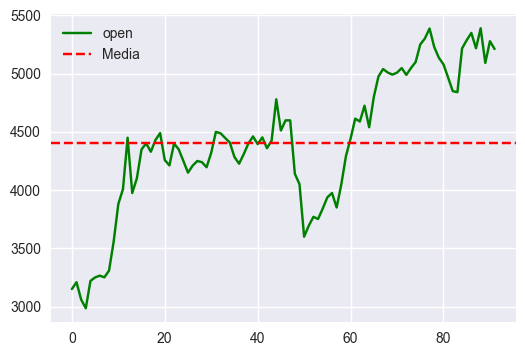

La media de open tiene un valor de 4403.5673881199045


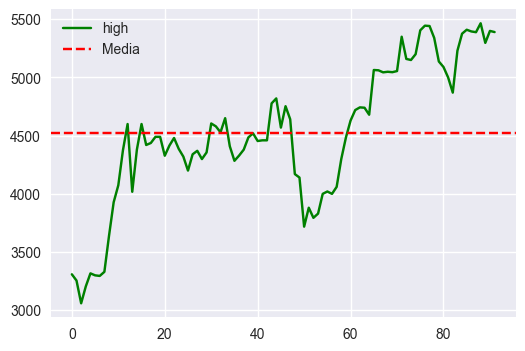

La media de high tiene un valor de 4520.616858440897


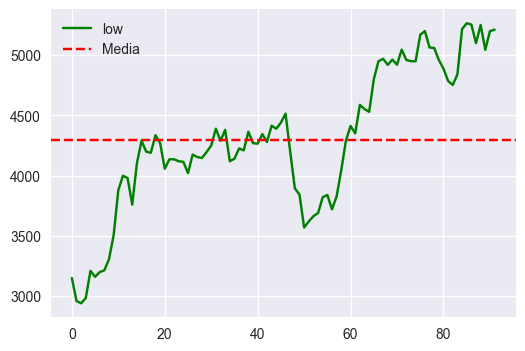

La media de low tiene un valor de 4297.422281016474


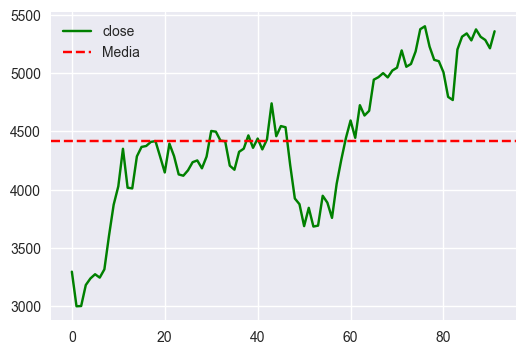

La media de close tiene un valor de 4415.131517493207


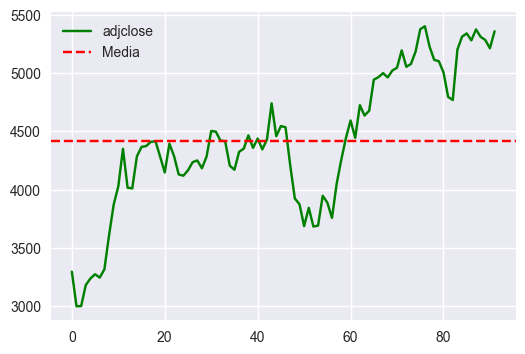

La media de adjclose tiene un valor de 4415.131517493207


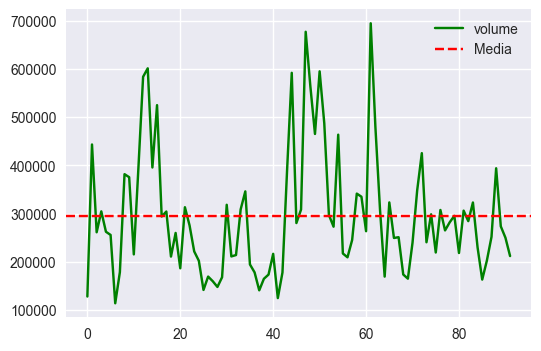

La media de volume tiene un valor de 294382.54347826086


In [11]:
# Graficamos la media de las variables
for columna in columnas_info:

    media = df[columna].mean()
    plt.figure(figsize=(6, 4))
    plt.plot(df[columna], label=columna, color='g')
    plt.axhline(media, color='r', linestyle='--', label='Media')

    plt.legend()
    plt.show()
    
    print(f"La media de {columna} tiene un valor de {media}")


In [12]:
#Creamos una función para calcular la media, desviacion estandar y la varianza

def desc_est(columna):
    media = df[columna].mean()
    desv_std = df[columna].std()
    varianza = df[columna].var()

    print()
    print(f"-------- {columna.upper()} --------")
    print(f"Media:  {media}")
    print(f"Desviación estándar:  {desv_std}")
    print(f"Varianza: {varianza}")

    return media, desv_std, varianza

In [13]:
# Creamos un bucle para obtener la informacion de todas las columnas
for columna in columnas_info:
    descripción = desc_est(columna)


-------- OPEN --------
Media:  4403.5673881199045
Desviación estándar:  605.1149692199494
Varianza: 366164.1259740604

-------- HIGH --------
Media:  4520.616858440897
Desviación estándar:  603.7468224387508
Varianza: 364510.2256048884

-------- LOW --------
Media:  4297.422281016474
Desviación estándar:  599.32970662733
Varianza: 359196.09724600136

-------- CLOSE --------
Media:  4415.131517493207
Desviación estándar:  605.0385020359844
Varianza: 366071.58894594794

-------- ADJCLOSE --------
Media:  4415.131517493207
Desviación estándar:  605.0385020359844
Varianza: 366071.58894594794

-------- VOLUME --------
Media:  294382.54347826086
Desviación estándar:  128878.97551054027
Varianza: 16609790328.646439


In [15]:
#Calculamos la diferencia entre la media de los valores más altos y mpas bajos diarios

dif_high_low = 4520.616858440897 - 4297.422281016474

print("La diferencia entre la media de HIGH y LOW es de ", dif_high_low)

La diferencia entre la media de HIGH y LOW es de  223.1945774244232
